In [16]:
import pandas as pd
import numpy as np
import os
import re
import cv2
from os.path import join, isfile
import matplotlib.pyplot as plt

In [17]:
col_frames = os.listdir('frames/')
col_frames.sort(key = lambda k: int(re.sub('\D','',k)))

In [18]:
images = []
for i in col_frames:
    img = cv2.imread('frames/'+i)
    images.append(img)

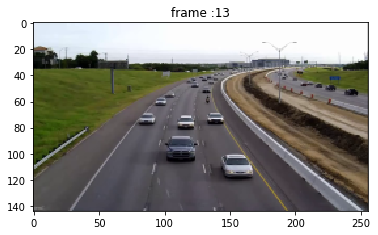

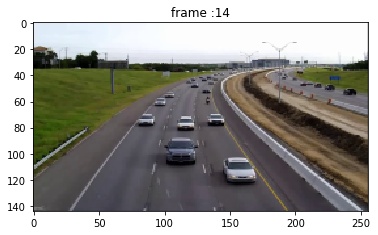

In [19]:
# Plotting two consecutive frames
i = 13

for frame in [i,i+1]:
    plt.imshow(cv2.cvtColor(images[frame],cv2.COLOR_BGR2RGB))
    plt.title("frame :" + str(frame))
    plt.show()

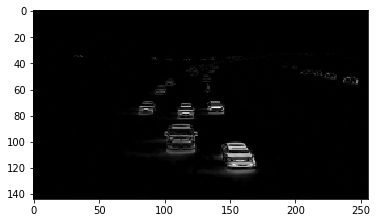

In [20]:
# Converting to grayscale and pottimg frame differencing
grayA = cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(images[i+1],cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.absdiff(grayB,grayA),cmap = 'gray')
plt.show()

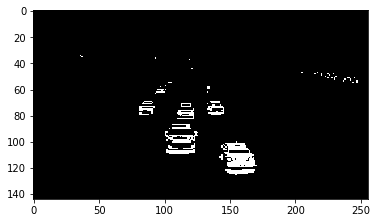

In [21]:
# Image Threholding
img_diff = cv2.absdiff(grayB,grayA)

ret,thresh = cv2.threshold(img_diff,30,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.show()

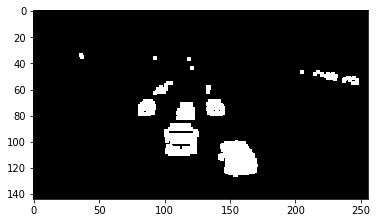

In [22]:
# Image dilation

filter1 = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,filter1,iterations = 1)

plt.imshow(dilated,cmap='gray')
plt.show()

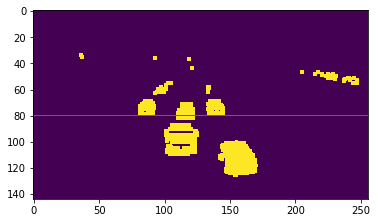

In [23]:
# Vehicle detection zone
cv2.line(dilated,(0,80),(256,80),(100,0,0))
plt.imshow(dilated)
plt.show()

In [24]:
# Contours
_,contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [25]:
cntrs = []
for i,cntr in enumerate(contours):
    x,y,w,h =cv2.boundingRect(cntr)
    if (x<200) & (y>80) & (cv2.contourArea(cntr)>25):
        cntrs.append(cntr)

In [26]:
# len(contours),
# len()
# hierarchy

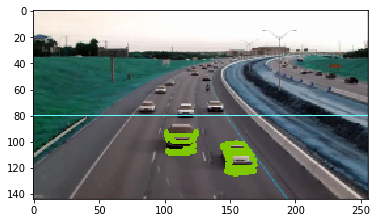

In [27]:
dummy = images[13].copy()

cv2.drawContours(dummy,cntrs,-1,(127,200,0),2)
cv2.line(dummy,(0,80),(256,80),(100,255,255))
plt.imshow(dummy)
plt.show()

In [35]:
kernel = np.ones((4,4),np.uint8)
font = cv2.FONT_HERSHEY_SIMPLEX
# pathIn = 

for i in range(len(images)-1):
    gray1 = cv2.cvtColor(images[i],cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(images[i+1],cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(gray2,gray1)
    
    ret,thresh = cv2.threshold(diff_image,30,255,cv2.THRESH_BINARY)
    dilated = cv2.dilate(thresh,kernel,iterations=1)
    
    _,contours,hierarchy = cv2.findContours(dilated.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x<=200) & (y>=80) & (cv2.contourArea(cntr)>=25):
            if (y>=90) & (cv2.contourArea(cntr)<40):
                breakpathOut
            valid_cntrs.append(cntr)
            
    dmy = images[i].copy()
    cv2.drawContours(dmy,valid_cntrs,-1,(127,200,0),2)
    
    cv2.putText(dmy,"Vehicle's detected:" + str(len(valid_cntrs)),(55,15),font,0.6,(0,180,0),2)
    cv2.line(dmy,(0,80),(256,80),(100,255,255))
    cv2.imwrite(str(i)+'.png',dmy)
        

In [46]:
pathOut = 'vehicle_detection.mp4'

fps = 14.0

In [37]:
frame_array = []
files = [f for f in os.listdir('framess/')]

In [41]:
files.sort(key=lambda f:int(re.sub('\D','',f)))

for i in range(len(files)):
    filename = 'framess/' + files[i]
    
    img = cv2.imread(filename)
    height,width,layers = img.shape
    size = (width,height)
    frame_array.append(img)

In [44]:
len(frame_array)

115

In [48]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)
for i in range(len(frame_array)):
    out.write(frame_array[i])
    
out.release

<function VideoWriter.release>